## kMeans Clusters Exercises

These exercises should be saved as a pdf file, and then submitted to Moodle. To save as a pdf, use:
* File -> Download as -> PDF via Latex (if you have Latex on your computer).
* Print to PDF on your browser.

To make the notebooks easy to read, please follow these guidelines:
* Keep lines to less than 80 characters.
* Suppress unrequired output, e.g., by using semi-colons at the end of the last line of cells.

For these exercises we will use the penguins dataset from `seaborn`. After loading the dataset, remove any rows with missing values and create a numeric classification for `species`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.metrics import confusion_matrix
from logitplots import plt_confusion_matrix, plt_decision_boundaries
from scipy.stats import mode

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
                how='any',inplace=True)
penguins['code'] = penguins.species.astype('category').cat.codes 
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,code
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2


### Exercise 1

Using all the numerical features, model the dataset using three clusters and 10 random initializations. You will need to normalize the data before passing it to `KMeans()`. (2 marks)

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

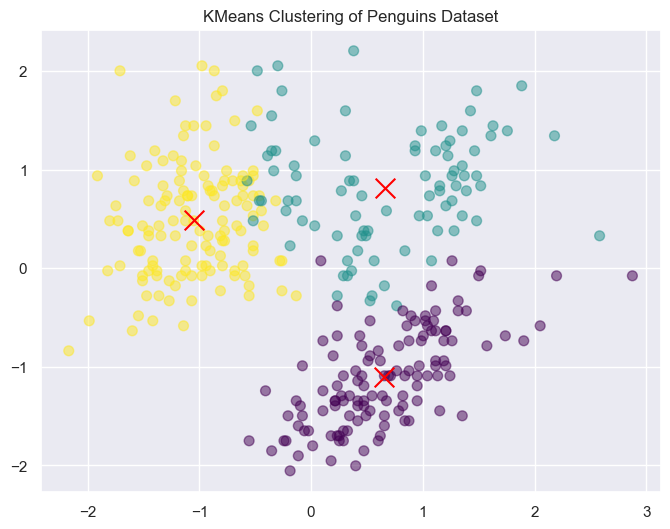

In [5]:
# Extract numerical features
numerical_features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(numerical_features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(normalized_features)

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

plt.title('KMeans Clustering of Penguins Dataset')
plt.grid(True)
plt.show()


### Exercise 2

Using similar calculations as for the digits modelling, calculate the accuracy of the `KMeans()` model and plot the confusion matrix for this classification. You should get an accuracy of approximately 91%. (2 marks)

In [6]:
from sklearn.metrics import accuracy_score

Accuracy of KMeans model: 0.915


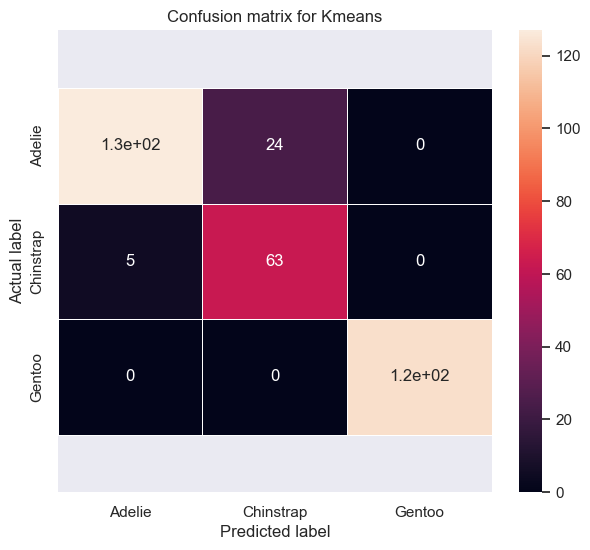

In [7]:
# Assign cluster labels based on the most frequent true label within each cluster
cluster_labels = np.zeros_like(kmeans.labels_)
for i in range(3):
    mask = (kmeans.labels_ == i)
    cluster_labels[mask] = mode(penguins['code'][mask], axis=None, keepdims=True)[0]

# Calculate accuracy
accuracy = np.round(accuracy_score(penguins['code'], cluster_labels),3)
print("Accuracy of KMeans model:", accuracy)

# Plot confusion matrix
conf_matrix = confusion_matrix(penguins['code'], cluster_labels)
plt_confusion_matrix(conf_matrix, ['Adelie', 'Chinstrap', 'Gentoo'], 'Kmeans')
plt.show()


### Exercise 3

Calculate the first two principal components for the dataset, and repeat the calculation of the accuracy in Exercises 1 and 2 using this decomposition.  You should get an accuracy of approximately 80%. (2 marks)

In [8]:
from sklearn.decomposition import PCA

Accuracy using PCA: 0.8801169590643275


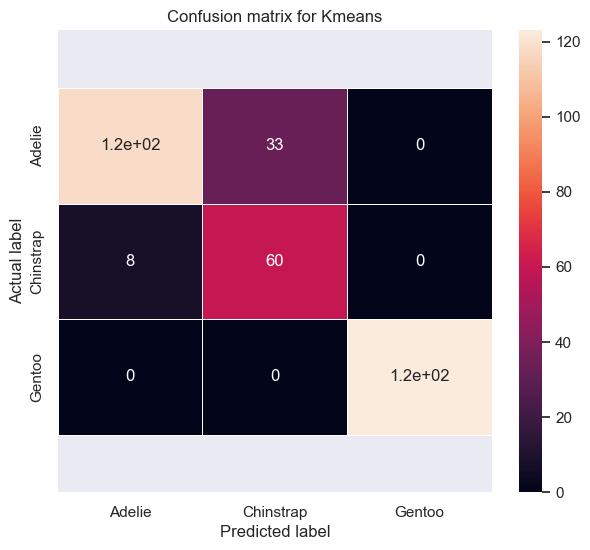

In [9]:
# Perform PCA to reduce dimensionality to two components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)

# Apply KMeans clustering on the reduced dataset
kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_pca.fit(pca_features)

# Assign cluster labels based on the most frequent true label within each cluster
cluster_labels_pca = np.zeros_like(kmeans_pca.labels_)
for i in range(3):
    mask = (kmeans_pca.labels_ == i)
    cluster_labels_pca[mask] = mode(penguins['code'][mask], axis=None, keepdims=True)[0]

# Calculate accuracy
accuracy_pca = accuracy_score(penguins['code'], cluster_labels_pca)
print("Accuracy using PCA:", accuracy_pca)

# Plot confusion matrix
conf_matrix_pca = confusion_matrix(penguins['code'], cluster_labels_pca)
plt_confusion_matrix(conf_matrix_pca, ['Adelie', 'Chinstrap', 'Gentoo'], 'Kmeans')
plt.show()


### Exercise 4

Plot the decision boundaries for the model in Exercise 3, and overlay a scatter plot of the actual labels. (2 marks)

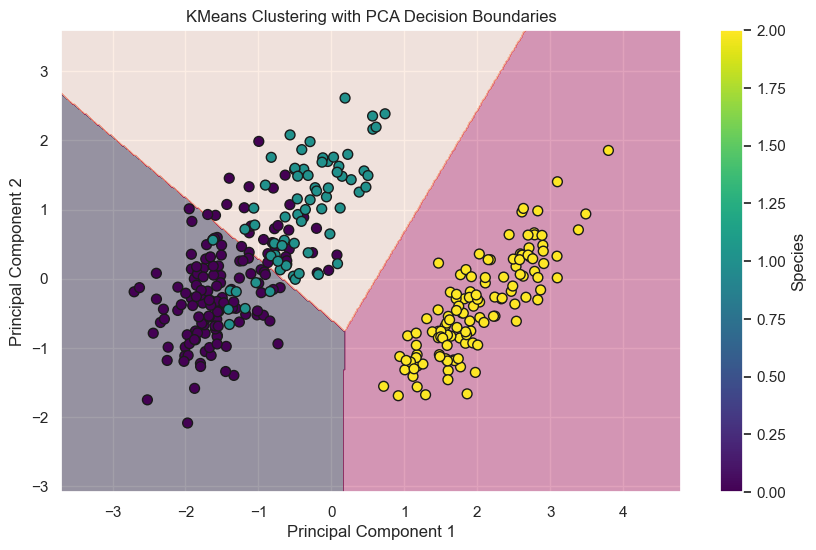

In [10]:
# Plot decision boundaries and overlay scatter plot of actual labels
plt.figure(figsize=(10, 6))

# Define a mesh grid
x_min, x_max = pca_features[:, 0].min() - 1, pca_features[:, 0].max() + 1
y_min, y_max = pca_features[:, 1].min() - 1, pca_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict cluster labels for each point in the mesh grid
Z = kmeans_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundaries
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

# Overlay scatter plot of actual labels
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=penguins['code'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA Decision Boundaries')
plt.colorbar(label='Species')
plt.show()

### Exercise 5

Using similar calculations as for the `blobs` dataset, calculate how the inertia varies with the chosen number of clusters. (2 marks)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'Inertia vs. Number of Clusters')

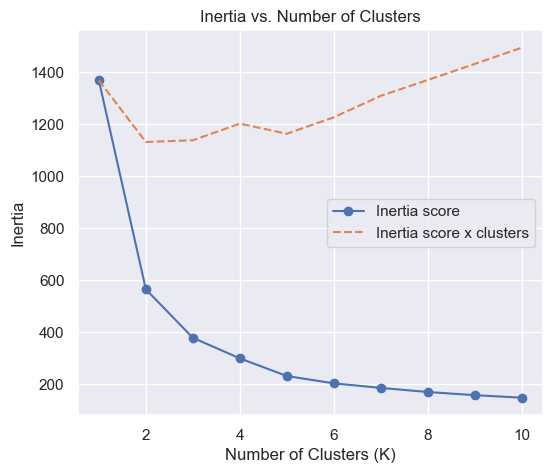

In [11]:
# create an array of the number clusters to investigate
nclusters = np.arange(1,11)

# initialize an array for the inertia score
inertia_score = []

# loop over the number of clusters
for ncl in nclusters:
    # instantatiate KMeans with ncl clusters
    kmeans = KMeans(n_clusters=ncl, random_state = 42)
    kmeans.fit(normalized_features)
    inertia_score.append(kmeans.inertia_)

# Plot the inertia values
fig = plt.figure(figsize=(6,5))
plt.plot(nclusters,inertia_score,'-',label='Inertia score', marker = 'o')
plt.plot(nclusters,nclusters*inertia_score,'--',label='Inertia score x clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.legend()
plt.title('Inertia vs. Number of Clusters')
